In [1]:
from ROOT import TFile, TCanvas, TLegend, TLatex
from CanvasConfigs import configs

Welcome to JupyROOT 6.24/06


In [2]:
p2016 = ["preVFP_B_ver2", "preVFP_C", "preVFP_D", "preVFP_E", "preVFP_F", "postVFP_F", "postVFP_G", "postVFP_H"]
p2017 = ["2017-B", "2017-C", "2017-D", "2017-E", "2017-F"]
p2018 = ["2018-A", "2018-B", "2018-C", "2018-D"]

In [3]:
def get_hist(period, histkey):
    if "preVFP" in period:
        f = TFile.Open(f"SKFlatOutputs/2016preVFP/DATA/trigEmuCuts_MuonEG_{period[7:]}.root")
    elif "postVFP" in period:
        f = TFile.Open(f"SKFlatOutputs/2016postVFP/DATA/trigEmuCuts_MuonEG_{period[8:]}.root")
    else:
        f = TFile.Open(f"SKFlatOutputs/{period[:4]}/DATA/trigEmuCuts_MuonEG_{period[-1]}.root")
    h = f.Get(histkey)
    try:
        h.SetDirectory(0)
    except Exception as e:
        print(e)
        print(period, histkey)
        raise KeyError
    f.Close()
    
    return h

In [4]:
class Canvas():
    def __init__(self, configs=None):
        self.cvs = TCanvas("c", "", 720, 800)
        self.legend = TLegend(0.6, 0.65, 0.9, 0.85)
        self.legend.SetFillStyle(0)
        self.legend.SetBorderSize(0)
        self.info = TLatex()
        self.info.SetTextSize(0.03)
        self.info.SetTextFont(42)
        self.logo = TLatex()
        self.logo.SetTextSize(0.04)
        self.logo.SetTextFont(61)
        self.extra_logo = TLatex()
        self.extra_logo.SetTextSize(0.035)
        self.extra_logo.SetTextFont(52)
        self.colors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        self.configs = configs
        
    def get_hist_dict(self, hists):
        self.hist_dict = hists
        self.__decorate()
        
    def __decorate(self):
        maximum = 0
        for i, (name, hist) in enumerate(self.hist_dict.items()):
            hist.SetStats(0)
            hist.SetLineColor(self.colors[i])
            hist.SetLineWidth(2)
            maximum = max(maximum, hist.GetMaximum())
            
            if "x_title" in self.configs.keys():
                hist.GetXaxis().SetTitle(self.configs["x_title"])
                hist.GetXaxis().SetTitleSize(0.03)
                hist.GetXaxis().SetTitleOffset(1.2)
            if "y_title" in self.configs.keys():
                hist.GetYaxis().SetTitle(self.configs["y_title"])
                hist.GetYaxis().SetTitleSize(0.035)
                hist.GetYaxis().SetTitleOffset(1.4)
                
            if "x_range" in self.configs.keys():
                hist.GetXaxis().SetRangeUser(self.configs["x_range"][0], self.configs["x_range"][1])
            
            self.legend.AddEntry(hist, name, "l")
        
        for (name, hist) in self.hist_dict.items():
            hist.GetYaxis().SetRangeUser(1., maximum*20)
    
    def combine(self):
        self.cvs.SetLogy()
        self.cvs.cd()
        for name, hist in self.hist_dict.items():
            hist.Draw("hist&same")
        self.cvs.RedrawAxis()
        self.legend.Draw("same")
        self.info.DrawLatexNDC(0.76, 0.91, "period dep.")
        self.logo.DrawLatexNDC(0.2, 0.8, "CMS")
        self.extra_logo.DrawLatexNDC(0.2, 0.76, "Work in progress")
        
        # extra informations
        if "extra_info1" in self.configs.keys():
            self.extra_info1 = TLatex()
            self.extra_info1.SetTextSize(0.03)
            self.extra_info1.SetTextFont(42)
            self.extra_info1.DrawLatexNDC(0.5, 0.54, self.configs["extra_info1"])
        if "extra_info2" in self.configs.keys():
            self.extra_info2 = TLatex()
            self.extra_info2.SetTextSize(0.03)
            self.extra_info2.SetTextFont(42)
            self.extra_info2.DrawLatexNDC(0.55, 0.49, self.configs["extra_info2"])
        
    def draw(self):
        self.cvs.Draw()
        
    def savefig(self, figname):
        self.cvs.SaveAs(figname)

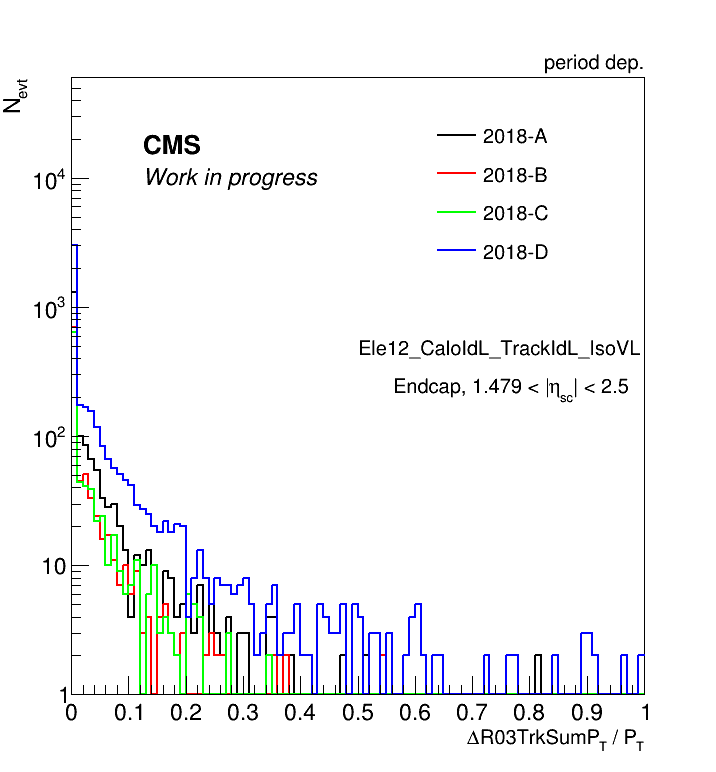

In [5]:
hists = dict()
histkey = "passEle12/electron/EndCap/dr03TkSumPt"
for period in p2018:
    hists[period] = get_hist(period, histkey)

cvs = Canvas(configs=configs[histkey])
cvs.get_hist_dict(hists)
cvs.combine()
cvs.draw()

In [9]:
# generate all the plots
for histkey in configs.keys():
    hists = dict()
    for period in p2016:
        hists[period] = get_hist(period, histkey)
    cvs = Canvas(configs=configs[histkey])
    cvs.get_hist_dict(hists)
    cvs.combine()
    cvs.savefig(f"../www/HcToWA/UltraLegacy/trigEmuCuts/2016/{histkey.replace('/', '_')}.png")
    
    del hists, cvs
    
    hists = dict()
    for period in p2017:
        hists[period] = get_hist(period, histkey)
    cvs = Canvas(configs=configs[histkey])
    cvs.get_hist_dict(hists)
    cvs.combine()
    cvs.savefig(f"../www/HcToWA/UltraLegacy/trigEmuCuts/2017/{histkey.replace('/', '_')}.png")
    
    del hists, cvs
    
    hists = dict()
    for period in p2018:
        hists[period] = get_hist(period, histkey)
    cvs = Canvas(configs=configs[histkey])
    cvs.get_hist_dict(hists)
    cvs.combine()
    cvs.savefig(f"../www/HcToWA/UltraLegacy/trigEmuCuts/2018/{histkey.replace('/', '_')}.png")
    
    del hists, cvs


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ../www/HcToWA/UltraLegacy/trigEmuCuts/2016/passEle12_electron_Barrel_Full5x5_sigmaIetaIeta.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ../www/HcToWA/UltraLegacy/trigEmuCuts/2017/passEle12_electron_Barrel_Full5x5_sigmaIetaIeta.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ../www/HcToWA/UltraLegacy/trigEmuCuts/2018/passEle12_electron_Barrel_Full5x5_sigmaIetaIeta.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ../www/HcToWA/UltraLegacy/trigEmuCuts/2016/passEle12_electron_EndCap_Full5x5_sigmaIetaIeta.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ../www/HcToWA/UltraLegacy/trigEm